## Student Name:- Vilohit Keshava Murthy Achar

## Student Id:- 23077751

In [1]:
!pip install deap matplotlib

Import the DEAP tools and useful libraries (random and matplotlib).

In [2]:
from deap import base
from deap import creator
from deap import tools
import numpy as np

import random

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters

In [3]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.3  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 10
MAX_WEIGHT = 1000

Set any problem-specific constants here. In this case we need to know how long the string is.

In [4]:
ONE_MAX_LENGTH = 60  # length of bit string to be optimized

Set the random seed. This is important so that we can reproduce runs later on.

In [5]:
# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Create our toolbox. Note that we can pull in a bunch of predefined operators to tailor our Evolutionary Algorithm, which, of course, in this case is a GA. Notice that it is possible to create our **own** operators and functions to use, which is what we do with our **oneMaxFitness** function below.

In [6]:
items = {}
for i in range(ONE_MAX_LENGTH):
    items[i] = (random.randint(1, 10), random.randint(1, 100))

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual[i] * items[i][0] for i in range(ONE_MAX_LENGTH)),  # return a tuple

toolbox.register("evaluate", oneMaxFitness)

Here is the main GA loop. We will iterate through it up to the MAX_GENERATIONS parameter and then print out our best individual.

In [7]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)
# Statistics to keep track of
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("max", np.max)
gen_stats = []
for gen in range(MAX_GENERATIONS):
      fitnessValues = list(map(toolbox.evaluate, population))
    # while max(fitnessValues) < ONE_MAX_LENGTH:
      for individual, fitnessValue in zip(population, fitnessValues):
          individual.fitness.values = fitnessValue

      # apply the selection operator, to select the next generation's individuals:
      offspring = toolbox.select(population, len(population))
      # clone the selected individuals:
      offspring = list(map(toolbox.clone, offspring))

      # apply the crossover operator to pairs of offspring:
      for child1, child2 in zip(offspring[::2], offspring[1::2]):
          if random.random() < P_CROSSOVER:
              toolbox.mate(child1, child2)
              del child1.fitness.values
              del child2.fitness.values

      for mutant in offspring:
          if random.random() < P_MUTATION:
              toolbox.mutate(mutant)
              del mutant.fitness.values

      freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
      freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
      for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
          individual.fitness.values = fitnessValue

      population[:] = offspring
      record = stats.compile(population)
      record = {
              "gen": gen,
              "avg": np.mean([ind.fitness.values[0] for ind in population]),
              "max": np.max([ind.fitness.values[0] for ind in population])
          }
      gen_stats.append(record)
      print("- Generation {}: Avg Fitness = {} Max Fitness = {}, ".format(gen, record['avg'], record['max']))


# find and print best individual:
best_index = fitnessValues.index(max(fitnessValues))
print("Best Individual = ", *population[best_index], "\n")

# best_ind = tools.selBest(population, 1)[0]
# total_weight = sum(items[i][1] for i in range(ONE_MAX_LENGTH) if best_ind[i] == 1)
# print("\nBest Individual:")
# print("Items selected:", best_ind)
# print("Total Value:", best_ind.fitness.values[0])
# print("Total Weight:", total_weight)

- Generation 0: Avg Fitness = 180.66 Max Fitness = 226.0, 
- Generation 1: Avg Fitness = 196.69 Max Fitness = 240.0, 
- Generation 2: Avg Fitness = 207.594 Max Fitness = 239.0, 
- Generation 3: Avg Fitness = 216.27 Max Fitness = 262.0, 
- Generation 4: Avg Fitness = 225.374 Max Fitness = 262.0, 
- Generation 5: Avg Fitness = 234.47 Max Fitness = 265.0, 
- Generation 6: Avg Fitness = 243.034 Max Fitness = 270.0, 
- Generation 7: Avg Fitness = 251.214 Max Fitness = 276.0, 
- Generation 8: Avg Fitness = 258.1 Max Fitness = 282.0, 
- Generation 9: Avg Fitness = 263.628 Max Fitness = 286.0, 
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 



Now that we're done, let's print out some statistics. Generally we record (at least) the max and average over time.

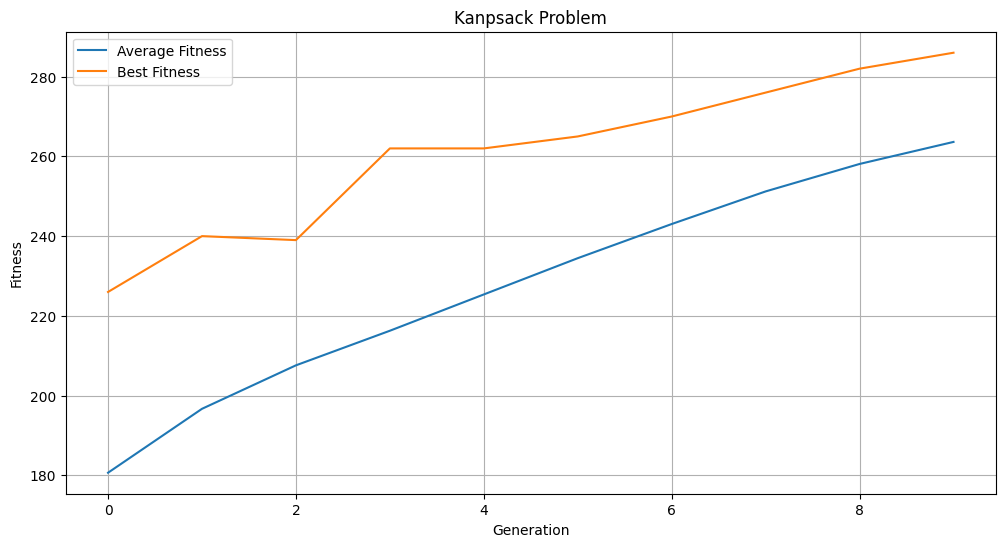

In [8]:
# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
gen_numbers = [record['gen'] for record in gen_stats]
avg_fitness = [record['avg'] for record in gen_stats]
max_fitness = [record['max'] for record in gen_stats]

plt.figure(figsize=(12, 6))
plt.plot(gen_numbers, avg_fitness, label="Average Fitness")
plt.plot(gen_numbers, max_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Kanpsack Problem")
plt.grid(True)
plt.show()